# Modelos de Aprendizado de Máquina
Neste notebook tem os seguintes modelos de aprendizado de máquina comparados:
- Floresta Aleatória
- SVM

## **1. Prepare Environment**

<br/>

### Imports

In [1]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Other
from IPython.display import Image
import warnings
import pprint
import datetime
import os

<br/>

### Set Config

In [2]:
%matplotlib inline

# Carrega a extensão "autoreload" para que o código possa mudar
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500,
    'figure.autolayout': True,
    'figure.figsize': [17, 12],
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'font.size': 10,
    'lines.linewidth': 1.0,
    'lines.markersize': 8,
    'legend.fontsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15}

sns.set_context("paper")  # Definindo o contexto para "paper"
sns.set_theme(style='darkgrid',
    palette='deep',
    color_codes=True,
    rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Suprima avisos desnecessários para que a apresentação pareça limpa
warnings.filterwarnings('ignore')

In [3]:
# plt.style.use('seaborn')  # fivethirtyeight - Removido
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set_theme(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set_theme(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

<br/>

### Load Data

In [4]:
%%time

df_soja = pd.read_csv(r'C:\Users\Lucas S\OneDrive\Documents\ADM_UFPB\TCC1\db_soja_modificado\db_pré_processado_dolar.csv',
                        encoding='utf8',
                        delimiter=',',
                        parse_dates=True,
                        index_col=0,
                        verbose=True)

Tokenization took: 26.11 ms
Type conversion took: 14.76 ms
Parser memory cleanup took: 0.00 ms
CPU times: total: 46.9 ms
Wall time: 75.1 ms


In [5]:
print(df_soja.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6450 entries, 2006-04-17 to 2023-12-13
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   preco         6450 non-null   float64
 1   residuos      6450 non-null   float64
 2   tendencia     6450 non-null   float64
 3   sazonalidade  6450 non-null   float64
 4   diff_1        6450 non-null   float64
 5   diff_2        6450 non-null   float64
 6   diff_3        6450 non-null   float64
 7   diff_4        6450 non-null   float64
 8   diff_5        6450 non-null   float64
dtypes: float64(9)
memory usage: 503.9 KB
None


In [6]:
df_soja.head()

,preco,residuos,tendencia,sazonalidade,diff_1,diff_2,diff_3,diff_4,diff_5
data,,,,,,,,,
2006-04-17,12.77,-0.04,12.77,-0.01,0.06,0.11,0.17,0.23,0.23
2006-04-18,12.88,-0.09,12.79,-0.01,0.11,0.17,0.22,0.28,0.34
2006-04-19,12.82,-0.26,12.82,-0.01,-0.06,0.05,0.11,0.16,0.22
2006-04-20,12.75,-0.25,12.85,-0.04,-0.07,-0.13,-0.02,0.04,0.09
2006-04-21,12.80,-0.13,12.88,-0.04,0.05,-0.02,-0.08,0.03,0.09


---

## **2. Split Data**

In [7]:
# Definir a série temporal
ts = df_soja

# Dividir os dados em treinamento e teste
size_train = int(len(ts) * 0.8)
df_train, df_test = ts[0:size_train], ts[size_train:len(ts)]
size_test = len(df_test)

print('Observations: %d' % (len(ts)))
print('Training Observations: %d' % (len(df_train)))
print('Testing Observations: %d' % (len(df_test)))

Observations: 6450
Training Observations: 5160
Testing Observations: 1290


In [8]:
df_soja_without_target = df_train.columns
df_soja_without_target = df_soja_without_target.drop('preco')

print(df_soja_without_target)

Index(['residuos', 'tendencia', 'sazonalidade', 'diff_1', 'diff_2', 'diff_3',
       'diff_4', 'diff_5'],
      dtype='object')


Text(0.5, 1.0, 'Train size: 5160')

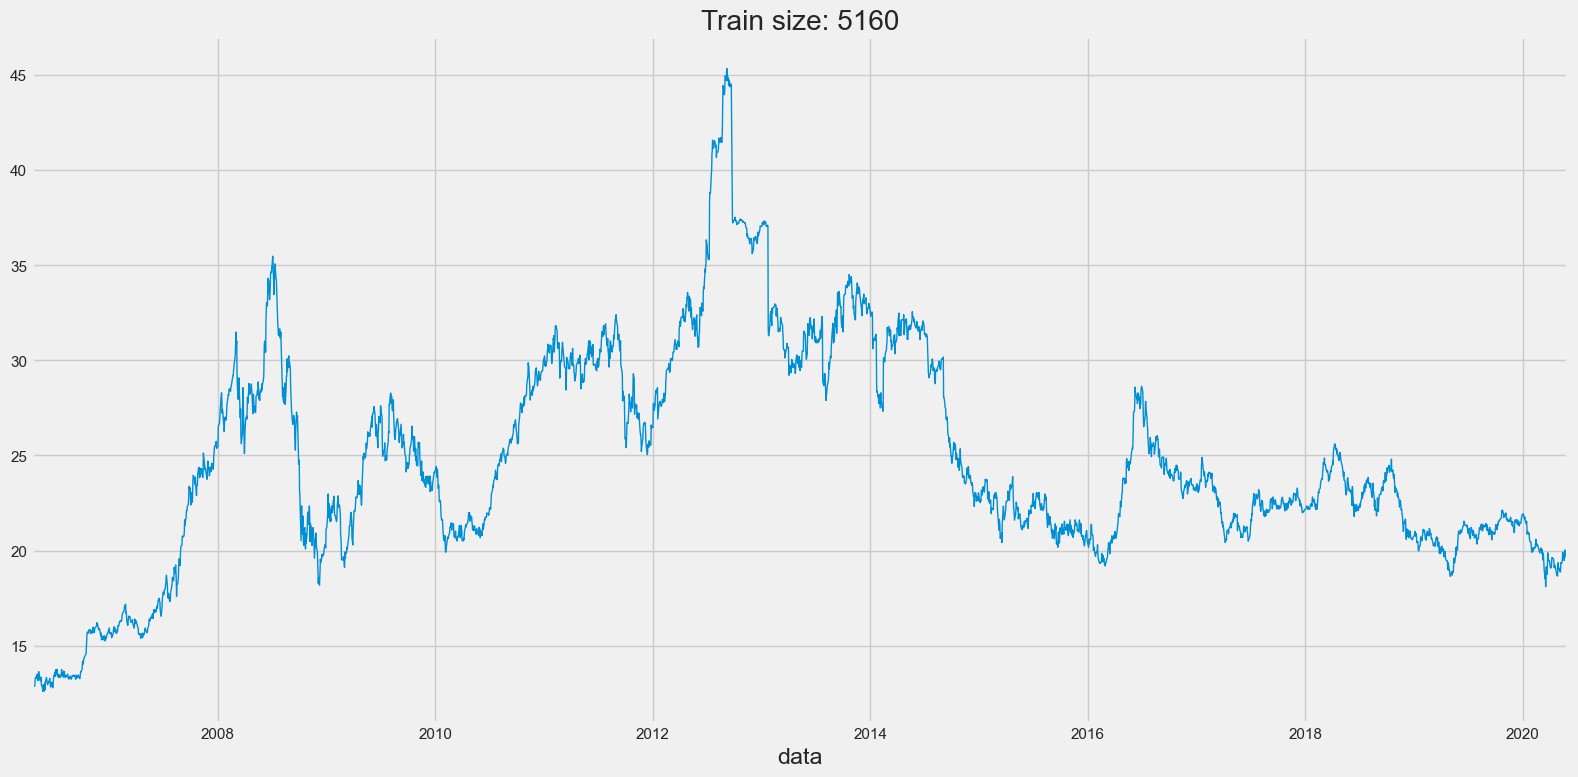

In [9]:
df_train['preco'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Train size: {len(df_train)}')

Text(0.5, 1.0, 'Test size: 1290')

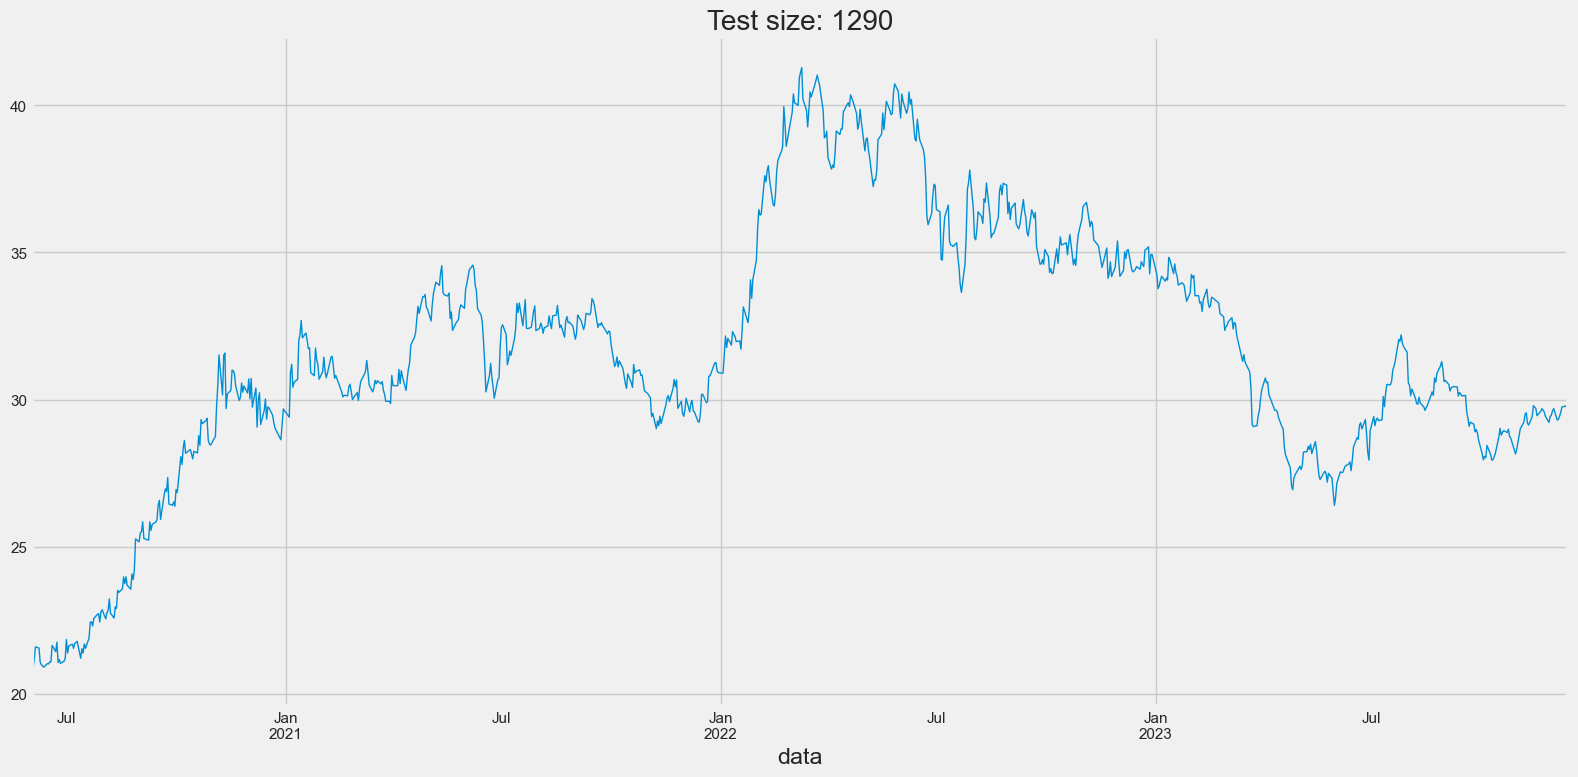

In [34]:
df_test['preco'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Test size: {len(df_test)}')

In [10]:
df_train.index

DatetimeIndex(['2006-04-17', '2006-04-18', '2006-04-19', '2006-04-20',
               '2006-04-21', '2006-04-22', '2006-04-23', '2006-04-24',
               '2006-04-25', '2006-04-26',
               ...
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
               '2020-05-31', '2020-06-01'],
              dtype='datetime64[ns]', name='data', length=5160, freq=None)

In [11]:
df_test.index

DatetimeIndex(['2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11',
               ...
               '2023-12-04', '2023-12-05', '2023-12-06', '2023-12-07',
               '2023-12-08', '2023-12-09', '2023-12-10', '2023-12-11',
               '2023-12-12', '2023-12-13'],
              dtype='datetime64[ns]', name='data', length=1290, freq=None)

In [12]:
X_train = df_train[df_soja_without_target]
y_train = df_train['preco']
print(len(X_train))
print(len(y_train))
print(type(X_train))
print(type(y_train))
print((X_train[:5]))
print(y_train[:5])


X_train = df_train[df_soja_without_target]
y_train = df_train['preco']

5160
5160
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
            residuos  tendencia  sazonalidade  diff_1  diff_2  diff_3  diff_4  \
data                                                                            
2006-04-17     -0.04      12.77         -0.01    0.06    0.11    0.17    0.23   
2006-04-18     -0.09      12.79         -0.01    0.11    0.17    0.22    0.28   
2006-04-19     -0.26      12.82         -0.01   -0.06    0.05    0.11    0.16   
2006-04-20     -0.25      12.85         -0.04   -0.07   -0.13   -0.02    0.04   
2006-04-21     -0.13      12.88         -0.04    0.05   -0.02   -0.08    0.03   

            diff_5  
data                
2006-04-17    0.23  
2006-04-18    0.34  
2006-04-19    0.22  
2006-04-20    0.09  
2006-04-21    0.09  
data
2006-04-17   12.77
2006-04-18   12.88
2006-04-19   12.82
2006-04-20   12.75
2006-04-21   12.80
Name: preco, dtype: float64


In [13]:
X_test = df_test[df_soja_without_target]
y_test = df_test['preco']
print(len(X_test))
print(len(y_test))
print(type(X_test))
print(type(y_test))
print(X_test[:5])
print(y_test[:5])

1290
1290
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
            residuos  tendencia  sazonalidade  diff_1  diff_2  diff_3  diff_4  \
data                                                                            
2020-06-02      0.17      20.52         -0.01    0.56    0.53    0.50    0.47   
2020-06-03     -0.21      20.57         -0.01    0.25    0.81    0.78    0.75   
2020-06-04     -0.17      20.63         -0.01    0.31    0.56    1.12    1.09   
2020-06-05      0.18      20.69         -0.04    0.43    0.74    0.99    1.55   
2020-06-06     -0.27      20.74         -0.04   -0.01    0.42    0.73    0.98   

            diff_5  
data                
2020-06-02    0.76  
2020-06-03    0.72  
2020-06-04    1.06  
2020-06-05    1.52  
2020-06-06    1.54  
data
2020-06-02   20.60
2020-06-03   20.85
2020-06-04   21.16
2020-06-05   21.59
2020-06-06   21.58
Name: preco, dtype: float64


---

---

## **Evaluation**

In [14]:
dict_results = {}

<br/>

### Display Results

In [25]:
def show_result_model(df_train, df_test, y_forecast, model_name):
    future_forecast = pd.DataFrame(y_forecast,
                                   index=df_test.index,
                                   columns=['previsao'])
    mape = mean_absolute_percentage_error(df_test, y_forecast)*100
    mse = mean_squared_error(df_test, y_forecast, squared=True)
    dict_results[model_name] = [mape, mse]
    
    pd.concat([df_test, future_forecast], axis=1).plot()

    plt.legend()
    plt.grid(True)
    plt.xlabel("Tempo (dias)", fontsize=20)
    plt.ylabel("Preço (R$)", fontsize=20)
    plt.title(f'MAPE = {mape:.2f} % | MSE = {mse:.2f}', fontsize=25)

---

## **Modeling**

<br/>

### **Build Model**

#### **Random Forest**

In [26]:
# RandomForest params dict
rf_params_one = {}
rf_params_one['criterion'] = 'squared_error'  # substituir 'mse' por 'squared_error'
rf_params_one['n_estimators'] = 10
rf_params_one['max_depth'] = 5
rf_params_one['max_features'] = None
rf_params_one['max_leaf_nodes'] = 15
rf_params_one['min_samples_leaf'] = 1
rf_params_one['random_state'] = 0
rf_params_one['n_jobs'] = -1 # run all process

In [27]:
model_rf_regressor = RandomForestRegressor(**rf_params_one)
model_rf_regressor

RandomForestRegressor(max_depth=5, max_features=None, max_leaf_nodes=15,
                      n_estimators=10, n_jobs=-1, random_state=0)

In [28]:
model_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=None, max_leaf_nodes=15,
                      n_estimators=10, n_jobs=-1, random_state=0)

In [29]:
y_pred_rf_regressor = model_rf_regressor.predict(X_test)
y_pred_rf_regressor[:5]

array([20.87020196, 20.87020196, 20.87020196, 20.87020196, 20.87020196])

In [30]:
len(y_train)

5160

In [31]:
len(y_test)

1290

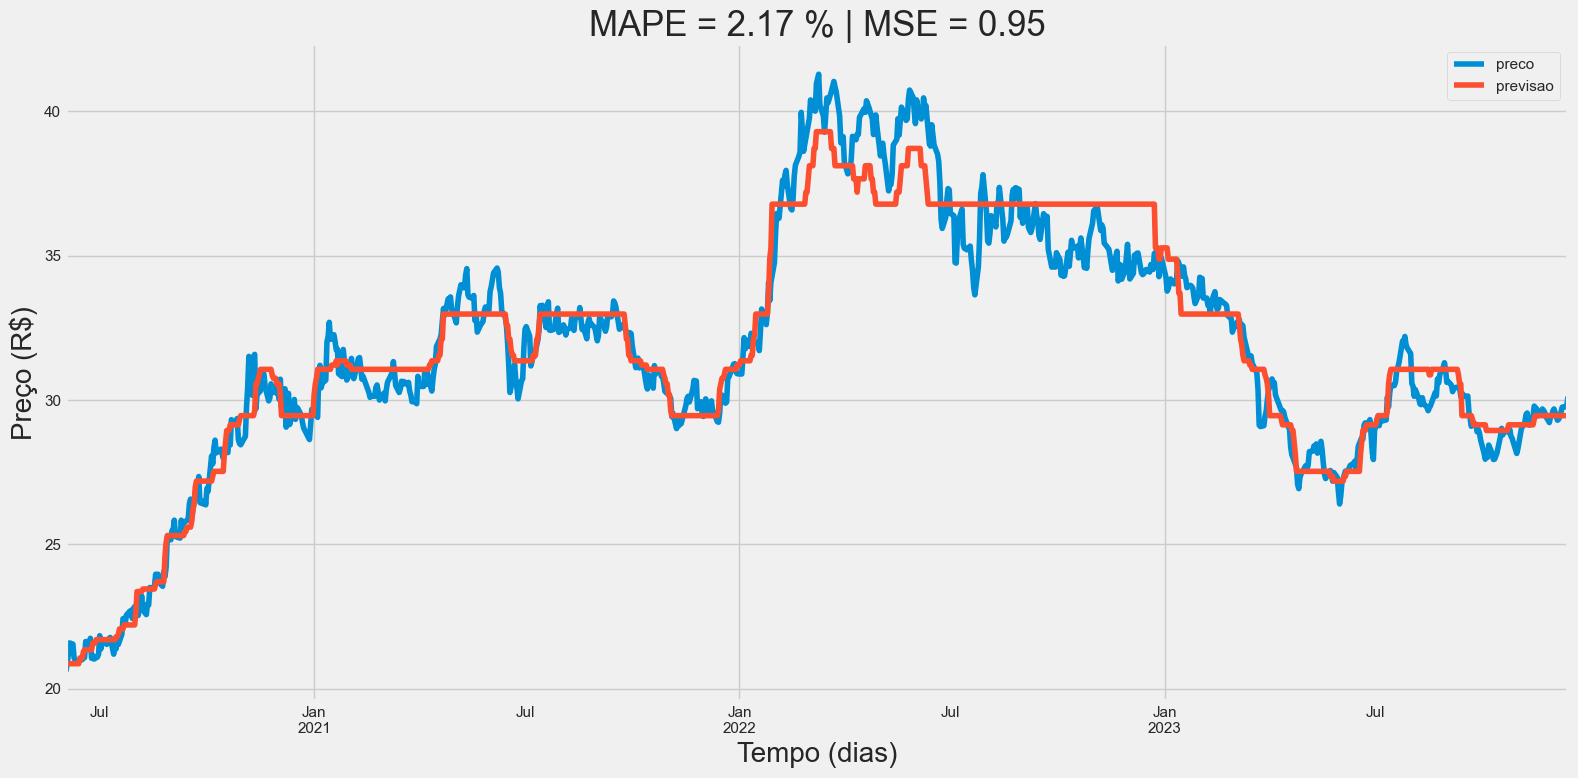

In [32]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_rf_regressor,
                  model_name='model_rf_regressor')

---

<br/>

#### **SVM**
- Doc sobre gamma: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
- Gamma é quem controla o learning rate

In [16]:
model_svm_regressor = SVR(kernel='rbf', gamma= 0.1) # kernel='rbf', gamma= 0.1 | kernel='poly', degree=1
model_svm_regressor

SVR(gamma=0.1)

In [17]:
model_svm_regressor.fit(X_train, y_train)

SVR(gamma=0.1)

In [18]:
y_pred_svm_regressor = model_svm_regressor.predict(X_test)
y_pred_svm_regressor[:5]

array([20.76313255, 20.89497462, 21.10480357, 21.47022219, 21.30942247])

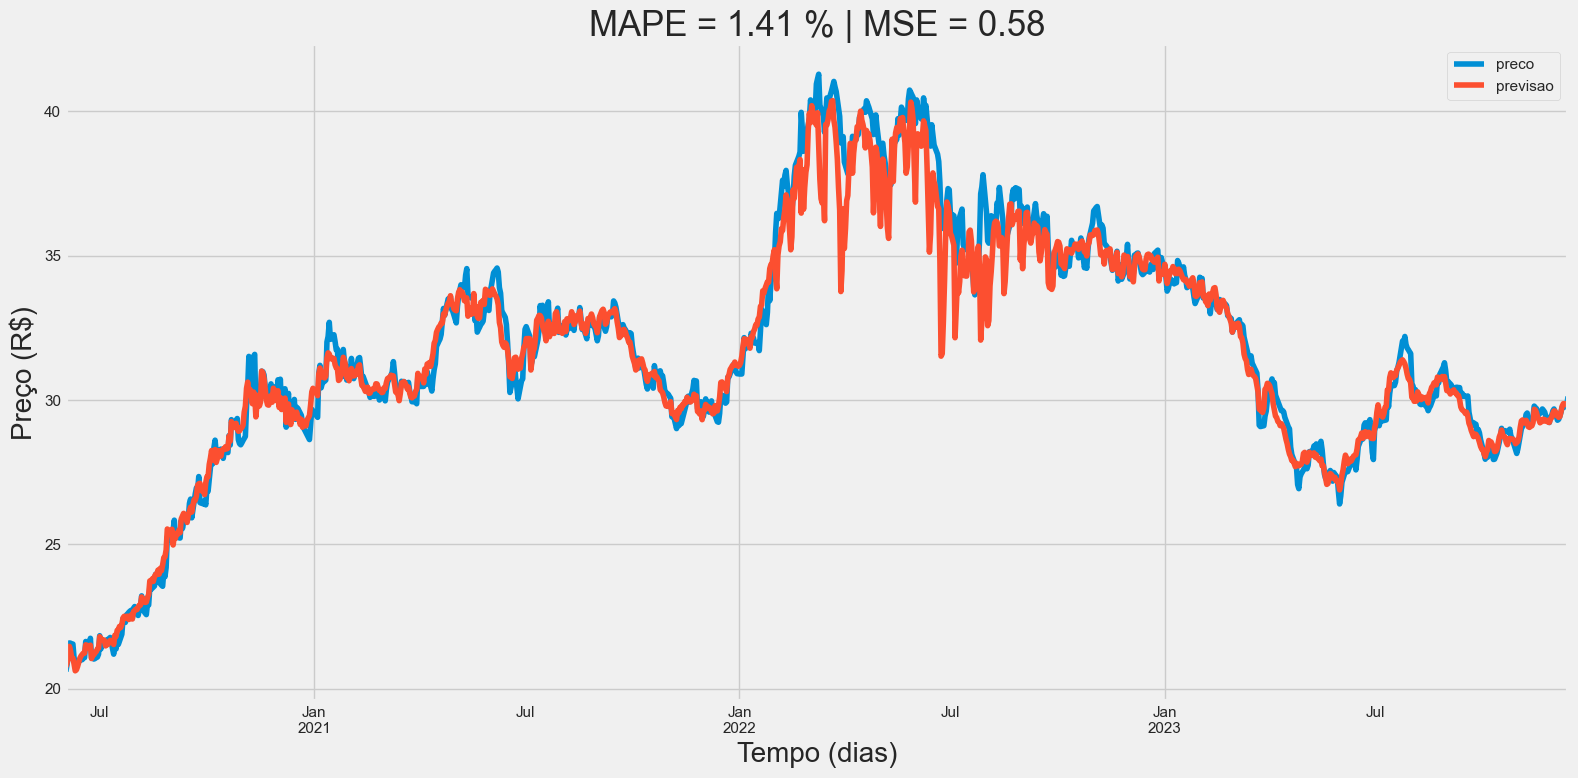

In [19]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_svm_regressor,
                  model_name='model_svm_regressor')

In [34]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest Regressor
rf_scores = cross_val_score(model_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)

# Cross-validation for SVR
svm_scores = cross_val_score(model_svm_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
svm_rmse_scores = np.sqrt(-svm_scores)

# Print the RMSE scores for each model
print("Random Forest Regressor RMSE scores:", rf_rmse_scores)
print("SVR RMSE scores:", svm_rmse_scores)
 

Random Forest Regressor RMSE scores: [3.25314431 0.69048761 2.57970644 0.46068677 0.45404415]
SVR RMSE scores: [8.40112274 0.42912396 5.7365891  0.28784885 0.22590696]


---

## **Results**

In [52]:
dict_results

{'model_rf_regressor': [2.172007277052161, 0.9460777170649535],
 'model_svm_regressor': [1.4076687731608013, 0.5826156415964455]}

---